In [1]:
import torch
torch.cuda.empty_cache()

In [3]:
import vllm
print(vllm.__version__)

0.5.0


In [1]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-1b")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-1b")
#model = model.half()

In [6]:
print(next(model.parameters()).dtype)

torch.float16


In [2]:
#model.save_pretrained('/home/IAIS/jdatta/thesis')

#tokenizer.save_pretrained('/home/IAIS/jdatta/thesis')

model.save_pretrained('/home/IAIS/jdatta/distillm-new/checkpoints')
tokenizer.save_pretrained('/home/IAIS/jdatta/distillm-new/checkpoints')

[2024-09-30 13:01:41,720] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/IAIS/jdatta/miniconda3/envs/vllm_env/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


('/home/IAIS/jdatta/distillm-new/checkpoints/tokenizer_config.json',
 '/home/IAIS/jdatta/distillm-new/checkpoints/special_tokens_map.json',
 '/home/IAIS/jdatta/distillm-new/checkpoints/tokenizer.json')

In [4]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/distillm-new/checkpoints")

INFO 09-30 13:03:37 config.py:1193] Casting torch.float32 to torch.float16.
INFO 09-30 13:03:37 config.py:1214] Downcasting torch.float32 to torch.float16.
INFO 09-30 13:03:37 llm_engine.py:161] Initializing an LLM engine (v0.5.0) with config: model='/home/IAIS/jdatta/distillm-new/checkpoints', speculative_config=None, tokenizer='/home/IAIS/jdatta/distillm-new/checkpoints', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0, served_model_name=/home/IAIS/jdatta/distillm-new/checkpoints)
INFO 09-30 13:03:41 model_runner.py:159] Loading model weights took 1.8848 GB
INF

In [9]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2-large')
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2-large')
model = model.half()

model.save_pretrained('/home/IAIS/jdatta/test')
tokenizer.save_pretrained('/home/IAIS/jdatta/test')

('/home/IAIS/jdatta/test/tokenizer_config.json',
 '/home/IAIS/jdatta/test/special_tokens_map.json',
 '/home/IAIS/jdatta/test/vocab.json',
 '/home/IAIS/jdatta/test/merges.txt',
 '/home/IAIS/jdatta/test/added_tokens.json')

: 

In [7]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/test")

INFO 07-23 23:05:33 llm_engine.py:176] Initializing an LLM engine (v0.5.3.post1) with config: model='/home/IAIS/jdatta/test', speculative_config=None, tokenizer='/home/IAIS/jdatta/test', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=/home/IAIS/jdatta/test, use_v2_block_manager=False, enable_prefix_caching=False)
INFO 07-23 23:05:33 model_runner.py:680] Starting to load model /home/IAIS/jdatta/test...
INFO 07-23 23:05:33 selector.py:151] Cannot use F

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-23 23:05:50 model_runner.py:692] Loading model weights took 1.4419 GB
INFO 07-23 23:05:51 gpu_executor.py:102] # GPU blocks: 9623, # CPU blocks: 1456
INFO 07-23 23:05:53 model_runner.py:980] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 07-23 23:05:53 model_runner.py:984] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 07-23 23:06:08 model_runner.py:1181] Graph capturing finished in 15 secs.


In [6]:
outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

KeyError: 'prompt'

In [3]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|███████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.07it/s]

Prompt: 'Hello, my name is', Generated text: ' Marissa and I am a senior at the University of South Carolina.  I'
Prompt: 'The president of the United States is', Generated text: ' the most powerful person in the world, the man in charge of the most powerful'
Prompt: 'The capital of France is', Generated text: ' Paris. Paris is an absolutely stunning city and one of the most popular tourist dest'
Prompt: 'The future of AI is', Generated text: ' now. You know how we’ve heard for years that AI is coming?'
Prompt: 'Our son walks', Generated text: ', runs, eats, plays, sleeps and does everything else perfectly.'
Prompt: 'The cat sat on the', Generated text: ' mat.\nThe mat was on the mat.\nThe mat was on the'


In [1]:
from datasets import load_dataset

# Load SQUAD dataset
dataset = load_dataset("rajpurkar/squad_v2")

# Split the dataset into train and test sets
dataset = dataset['train'].train_test_split(test_size=0.2)
train_dataset = dataset['train']
eval_dataset = dataset['test']

In [3]:
print(train_dataset)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 104255
})


In [26]:
################################## IMPORTANT (1st scenario)####################################

import torch
import datasets
from transformers import TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForCausalLM
import trl
import datetime
from trl import SFTConfig

torch.cuda.memory._record_memory_history(max_entries=100000)

train_dataset = datasets.load_dataset('rajpurkar/squad_v2', split='train')
def preprocess_function(examples):
    inputs = [q + " " + c for q, c in zip(examples["question"], examples["context"])]
    targets = [a["text"][0] if len(a["text"]) > 0 else "" for a in examples["answers"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

args = SFTConfig(
    output_dir="/home/IAIS/jdatta/teacher_model/test-galore",
    max_steps=5000,
    per_device_train_batch_size=1,
    fp16=False,
    dataset_text_field='input_ids',
    max_seq_length=128,
    learning_rate=1.0e-4,
    lr_scheduler_type="cosine",
    gradient_checkpointing=True,
    #num_train_epochs=3,
    optim="galore_adamw_8bit",
    optim_target_modules=["c_attn", "c_proj", "q_proj", "k_proj", "v_proj", "down_proj", "up_proj"],
    max_grad_norm=1.0,
    report_to=[]
)
model_id = "mistralai/Mistral-7B-v0.1"
config = AutoConfig.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
train_dataset=train_dataset.map(preprocess_function, batched=True,remove_columns=train_dataset.column_names)
model = AutoModelForCausalLM.from_config(config).half()

model.gradient_checkpointing_enable()

trainer = trl.SFTTrainer(
    model=model, 
    args=args,
    train_dataset=train_dataset,
)

try:
    trainer.train()
except torch.cuda.OutOfMemoryError as error:
    now = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
    torch.cuda.memory._dump_snapshot(f"oom_snapshot_{now}.pickle")
    raise error
    
trainer.train()

model.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")
tokenizer.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")

/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[2024-07-02 11:29:46,375] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:397: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
Activated GaLoRE fine-tuning, depending on your model size and hardware, the training might take a while before starting. Please be patient !
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

print(f"CUDA_LAUNCH_BLOCKING: {os.environ['CUDA_LAUNCH_BLOCKING']}")
print(f"CUDA_VISIBLE_DEVICES: {os.environ['CUDA_VISIBLE_DEVICES']}")

CUDA_LAUNCH_BLOCKING: 0
CUDA_VISIBLE_DEVICES: 0


In [2]:
################################## IMPORTANT (2nd scenario)####################################

import torch
import datasets
from transformers import TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForCausalLM
import trl
import datetime
from trl import SFTConfig

train_dataset = datasets.load_dataset('rajpurkar/squad_v2', split='train')
def preprocess_function(examples):
    inputs = [q + " " + c for q, c in zip(examples["question"], examples["context"])]
    targets = [a["text"][0] if len(a["text"]) > 0 else "" for a in examples["answers"]]
    model_inputs = tokenizer(inputs, max_length=32, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=32, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

args = SFTConfig(
    output_dir="/home/IAIS/jdatta/teacher_model/test-galore",
    max_steps=5000,
    per_device_train_batch_size=1,
    fp16=False,
    dataset_text_field='input_ids',
    max_seq_length=32,
    learning_rate=1.0e-4,
    lr_scheduler_type="cosine",
    gradient_checkpointing=True,
    #num_train_epochs=3,
    optim="galore_adamw_8bit",
    optim_target_modules=["c_attn", "c_proj", "q_proj", "k_proj", "v_proj", "down_proj", "up_proj"],
    max_grad_norm=1.0,
    report_to=[]
)
model_id = "mistralai/Mistral-7B-v0.1"
config = AutoConfig.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
train_dataset=train_dataset.map(preprocess_function, batched=True,remove_columns=train_dataset.column_names)
model = AutoModelForCausalLM.from_config(config).half()

model.gradient_checkpointing_enable()

trainer = trl.SFTTrainer(
    model=model, 
    args=args,
    train_dataset=train_dataset,
)

trainer.train()

model.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")
tokenizer.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")

/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

[2024-07-02 12:27:35,156] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:397: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
Activated GaLoRE fine-tuning, depending on your model size and hardware, the training might take a while before starting. Please be patient !
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recom

OutOfMemoryError: CUDA out of memory. Tried to allocate 56.00 MiB. GPU 

In [2]:
########################################## alpaca format #######################################

from datasets import load_dataset
import json
import os

# Load the SQuAD dataset
squad = load_dataset("rajpurkar/squad")

prepared_data = []
for item in squad['train']:
    question = item['question']
    context = item['context']
    answer = item['answers']['text'][0]  # Use the first answer
    prepared_data.append({'instruction': question, 'input': context, 'output': answer})

directory = "/home/IAIS/jdatta/LLaMA-Factory/data"
file_path = os.path.join(directory, 'squad_demo.json')

os.makedirs(directory, exist_ok=True)

with open(file_path, 'w') as file:
    json.dump(prepared_data, file, indent=2)

print(f"Data saved to {file_path}")


Data saved to /home/IAIS/jdatta/LLaMA-Factory/data/squad_demo.json


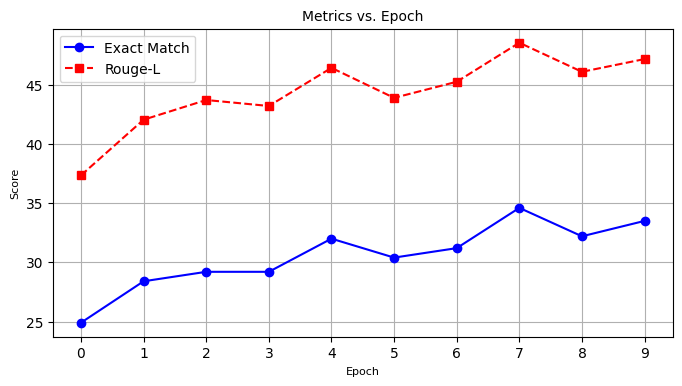

In [6]:
import matplotlib.pyplot as plt

epochs = list(range(0, 10))

exact_match = [24.9, 28.4, 29.2, 29.2, 32.0, 30.4, 31.2, 34.6, 32.2, 33.5]  
rougeL = [37.3458, 42.0471, 43.7102, 43.2062, 46.4264, 43.8924, 45.2505, 48.5491, 46.0918, 47.1704] 

plt.figure(figsize=(8, 4))
plt.plot(epochs, exact_match, marker='o', linestyle='-', color='b', label='Exact Match')
plt.plot(epochs, rougeL, marker='s', linestyle='--', color='r', label='Rouge-L')

plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Score', fontsize=8)
plt.title('Metrics vs. Epoch', fontsize=10)
plt.grid(True)
plt.xticks(epochs)
plt.legend()

plt.show()



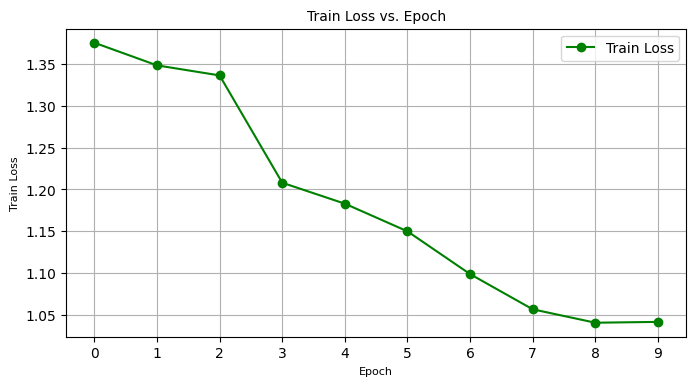

In [7]:
import matplotlib.pyplot as plt

epochs = list(range(0, 10))  
train_loss = [1.375, 1.348, 1.336, 1.208, 1.183, 1.150, 1.099, 1.057, 1.041, 1.042]  

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='g', label='Train Loss')

plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Train Loss', fontsize=8)
plt.title('Train Loss vs. Epoch', fontsize=10)
plt.grid(True)
plt.xticks(epochs)
plt.legend()

plt.show()


In [1]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

In [2]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/distilled_model")

INFO 07-28 20:13:35 config.py:1421] Downcasting torch.float32 to torch.float16.


INFO 07-28 20:13:36 llm_engine.py:176] Initializing an LLM engine (v0.5.3.post1) with config: model='/home/IAIS/jdatta/distilled_model', speculative_config=None, tokenizer='/home/IAIS/jdatta/distilled_model', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=/home/IAIS/jdatta/distilled_model, use_v2_block_manager=False, enable_prefix_caching=False)
INFO 07-28 20:13:36 selector.py:151] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 0

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-28 20:13:38 model_runner.py:692] Loading model weights took 0.2378 GB
INFO 07-28 20:13:39 gpu_executor.py:102] # GPU blocks: 50593, # CPU blocks: 7281


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.32 GiB. GPU 

: 

In [16]:
from datasets import load_dataset

dataset = load_dataset('mandarjoshi/trivia_qa', 'rc')

def save_as_jsonl(dataset_split, split_name):
    output_file = f'trivia_qa_{split_name}.jsonl'
    with open(output_file, 'w') as f:
        for example in dataset_split:
            f.write(f"{example}\n")
    print(f"Saved {split_name} split to {output_file}")

for split in dataset:
    save_as_jsonl(dataset[split], split)


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Saved train split to trivia_qa_train.jsonl
Saved validation split to trivia_qa_validation.jsonl
Saved test split to trivia_qa_test.jsonl


In [1]:
import torch
import os

teacher_model_path = '/home/IAIS/jdatta/distillm/checkpoints/gpt2-xlarge'
torch.save(model.state_dict(), teacher_model_path)

# Calculate and print the model size
model_size = os.path.getsize(teacher_model_path)
print(f"Model size: {model_size / (1024 * 1024)} MB")


NameError: name 'model' is not defined

In [2]:
import os

teacher_model_path = '/home/IAIS/jdatta/distillm/checkpoints/gpt2-large'

weights_file = os.path.join(teacher_model_path, 'pytorch_model.bin')
weights_size = os.path.getsize(weights_file)

print(f"Model weights size: {weights_size / (1024 * 1024):.2f} MB")

Model weights size: 2988.84 MB


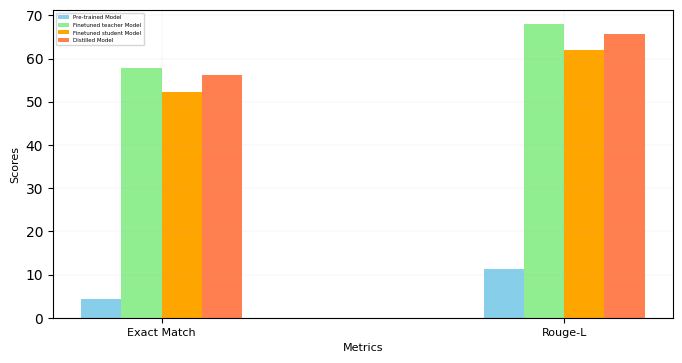

In [1]:
################# distillm(pythia) ####################

import matplotlib.pyplot as plt

metrics = ['Exact Match', 'Rouge-L']
pretrained_scores = [4.37,11.35]  
finetuned_teacher_scores = [57.8,67.9]
finetuned_student_scores = [52.3,62.01]
distilled_scores = [56.3, 65.7]  

x = range(len(metrics))
width = 0.1 
fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar([p - 1.5*width for p in x], pretrained_scores, width, color='skyblue', label='Pre-trained Model')
bars2 = ax.bar([p - 0.5*width for p in x], finetuned_teacher_scores, width, color='lightgreen', label='Finetuned teacher Model')
bars3 = ax.bar([p + 0.5*width for p in x], finetuned_student_scores, width, color='orange', label='Finetuned student Model')
bars4 = ax.bar([p + 1.5*width for p in x], distilled_scores, width, color='coral', label='Distilled Model')

ax.grid(True, which='both', linestyle='--', linewidth=0.1)

ax.set_xlabel('Metrics', fontsize=8)
ax.set_ylabel('Scores', fontsize=8)
ax.set_xticks([p for p in x])
ax.set_xticklabels(metrics, fontsize=8)

ax.legend(loc='upper left',  fontsize=4)

plt.show()

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load pre-trained model and tokenizer
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")

tokenizer.pad_token_id = tokenizer.eos_token_id

context = "Beyoncé Giselle Knowles-Carter is an American singer, songwriter, and actress. She rose to fame in the late 1990s as the lead singer of Destiny's Child."
question = "When did Beyoncé start becoming famous?"

prompt = (
    f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"

)

inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=512)

outputs = model.generate(
    inputs['input_ids'], 
    attention_mask=inputs['attention_mask'], 
    max_new_tokens=30,  
    do_sample=False,
    top_p=0.8,
    temperature = 0.7,
    repetition_penalty=1.2
)

# Decode and print the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

if "Answer:" in generated_text:
    generated_text = generated_text.split("Answer:")[1].split("\n")[0].strip()

print(generated_text)

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


In the late 1990s


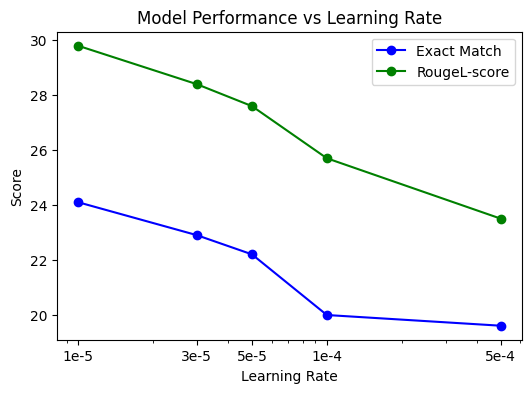

In [8]:
import matplotlib.pyplot as plt

learning_rates = [1*10**(-5), 3*10**(-5), 5*10**(-5), 1*10**(-4), 5*10**(-4)]
exact_match = [24.1, 22.9, 22.2, 19.99, 19.6]  
rougeL_score = [29.8, 28.4, 27.6, 25.7, 23.5]  

plt.figure(figsize=(6, 4))

plt.plot(learning_rates, exact_match, marker='o', label='Exact Match', color='blue')

plt.plot(learning_rates, rougeL_score, marker='o', label='RougeL-score', color='green')

plt.title('Model Performance vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Score')

plt.xscale('log')
plt.xticks(learning_rates, ['1e-5', '3e-5', '5e-5', '1e-4', '5e-4'])  

plt.legend()

plt.show()

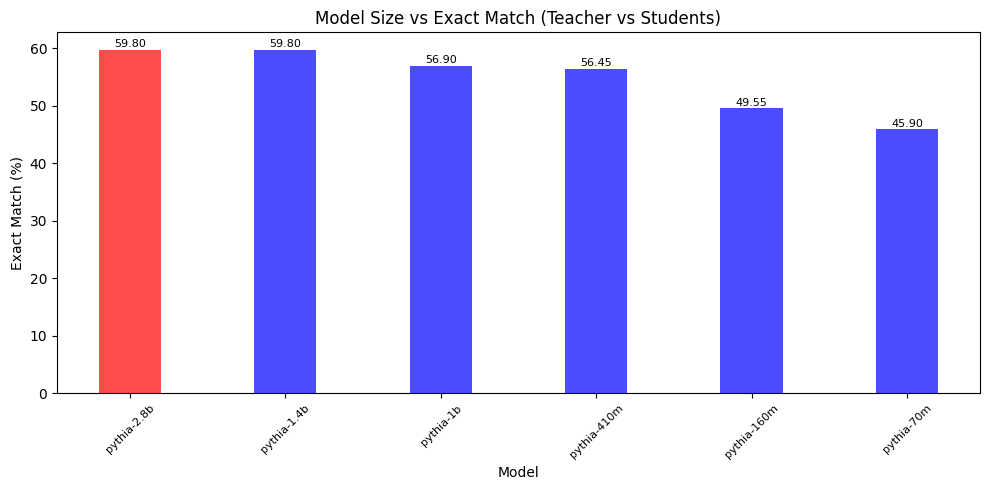

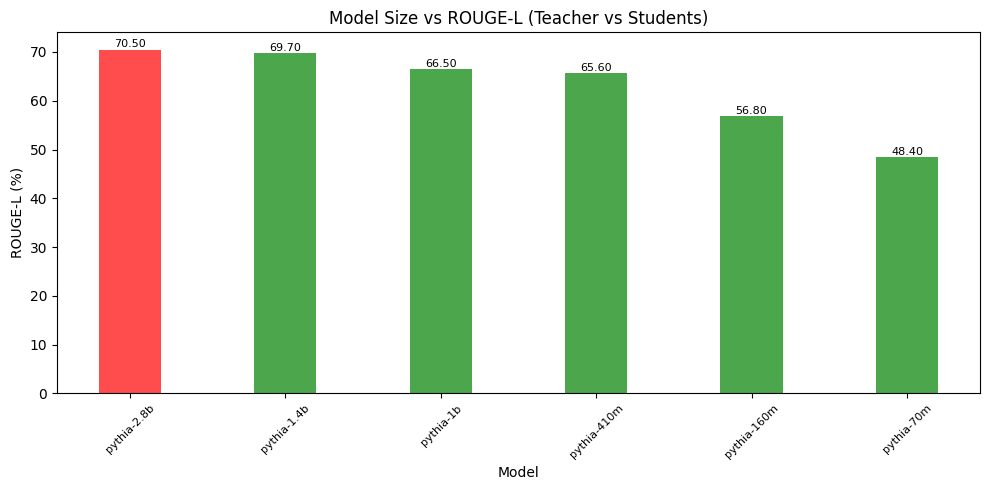

In [12]:
######################### compare Teacher & distilled models ####################

import matplotlib.pyplot as plt
import numpy as np

# Student models and their metrics
models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]  # Parameters in consistent units (millions or billions)
exact_match = [59.8, 56.9, 56.45, 49.55, 45.9]
rouge_l = [69.7, 66.5, 65.6, 56.8, 48.4]

# Teacher model
teacher_model = 'pythia-2.8b'
teacher_exact_match = 59.8
teacher_rouge_l = 70.5
teacher_parameters = 2.91e9

# Insert teacher model at the beginning of the lists
models.insert(0, teacher_model)
parameters.insert(0, teacher_parameters)
exact_match.insert(0, teacher_exact_match)
rouge_l.insert(0, teacher_rouge_l)

# Convert parameters to millions for consistency
parameters_in_millions = [param / 1e6 for param in parameters]

# Create x positions for the bars
x_pos = np.arange(len(models))

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(10, 5))
rects1 = plt.bar(x_pos, exact_match, width=0.4, color=['r'] + ['b']*5, alpha=0.7)  # Red color for teacher model
plt.xlabel('Model')
plt.ylabel('Exact Match (%)')
plt.title('Model Size vs Exact Match (Teacher vs Students)')
plt.xticks(x_pos, models, rotation=45, fontsize=8)

# Add Exact Match values and parameter size on top of the bars
for i, rect in enumerate(rects1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{exact_match[i]:.2f}', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(10, 5))
rects2 = plt.bar(x_pos, rouge_l, width=0.4, color=['r'] + ['g']*5, alpha=0.7)  # Red color for teacher model
plt.xlabel('Model')
plt.ylabel('ROUGE-L (%)')
plt.title('Model Size vs ROUGE-L (Teacher vs Students)')
plt.xticks(x_pos, models, rotation=45, fontsize=8)

# Add ROUGE-L values and parameter size on top of the bars
for i, rect in enumerate(rects2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{rouge_l[i]:.2f}', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

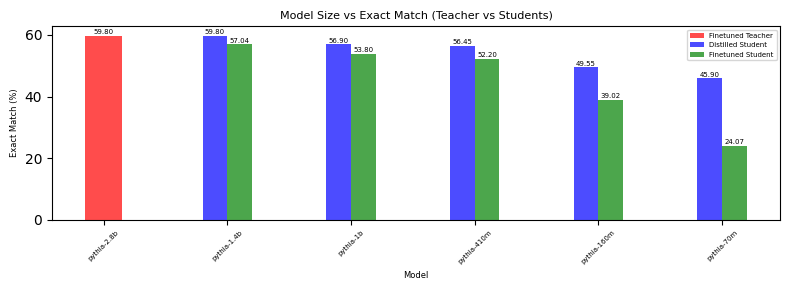

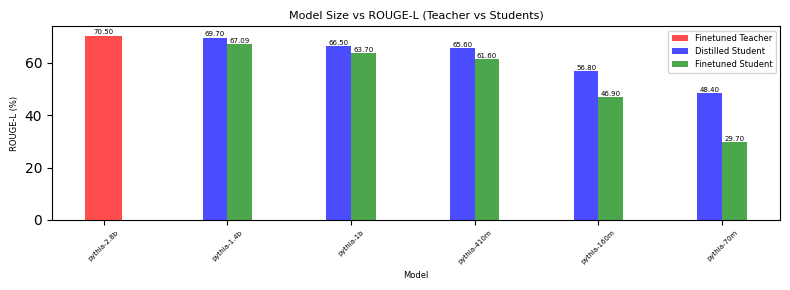

In [8]:
######################### compare finetuned & distilled models(Model:Pythia,squad) ####################

import matplotlib.pyplot as plt
import numpy as np

# Teacher model and its metrics
teacher_model = 'pythia-2.8b'
teacher_parameters = 2.91e9
teacher_exact_match = 59.8
teacher_rouge_l = 70.5

# Student models and their parameters
student_models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
student_parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]

# Distilled student scores
distilled_exact_match = [59.8, 56.9, 56.45, 49.55, 45.9]
distilled_rouge_l = [69.7, 66.5, 65.6, 56.8, 48.4]

# Finetuned student scores
finetuned_exact_match = [57.04, 53.8, 52.2, 39.02, 24.07]
finetuned_rouge_l = [67.09, 63.7, 61.6, 46.9, 29.7]

# Convert parameters to millions for consistency
teacher_parameters_in_millions = teacher_parameters / 1e6
student_parameters_in_millions = [param / 1e6 for param in student_parameters]

# Create x positions for the bars
x_teacher = [0]
x_students = np.arange(1, len(student_models) + 1)
#bar_width = 0.35
bar_width = 0.2

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('Exact Match (%)',fontsize=6)
plt.title('Model Size vs Exact Match (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=5)

# Add Exact Match values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_exact_match + 0.5, f'{teacher_exact_match:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
#plt.bar(x_teacher, [teacher_rouge_l], width=bar_width, color='r', alpha=0.7, label='Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('ROUGE-L (%)',fontsize=6)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=6)

# Add ROUGE-L values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_rouge_l + 0.5, f'{teacher_rouge_l:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

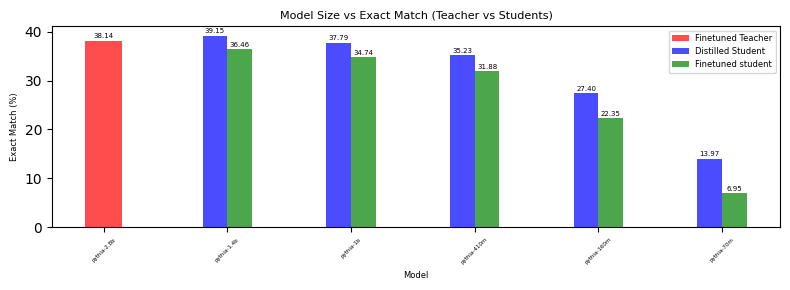

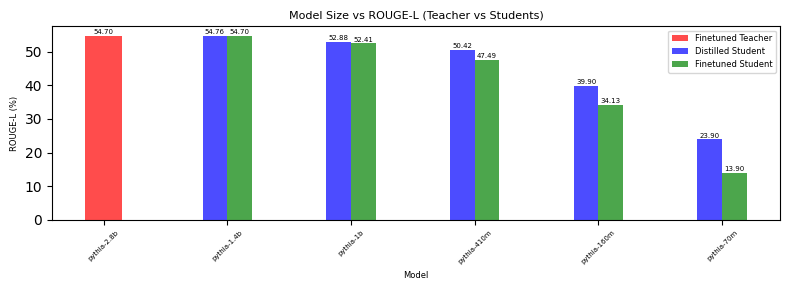

In [5]:
###################### compare finetuned & distilled models (Model:Pythia,mlqa.en) ####################

import matplotlib.pyplot as plt
import numpy as np

# Teacher model and its metrics
teacher_model = 'pythia-2.8b'
teacher_parameters = 2.91e9
teacher_exact_match = 38.14
teacher_rouge_l = 54.7

# Student models and their parameters
student_models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
student_parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]

# Distilled student scores
distilled_exact_match = [39.15, 37.79, 35.23, 27.4, 13.97]
distilled_rouge_l = [54.76, 52.88, 50.42, 39.9, 23.9]

# Finetuned student scores
finetuned_exact_match = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_rouge_l = [54.7, 52.41, 47.49, 34.13, 13.9]

# Convert parameters to millions for consistency
teacher_parameters_in_millions = teacher_parameters / 1e6
student_parameters_in_millions = [param / 1e6 for param in student_parameters]

# Create x positions for the bars
x_teacher = [0]
x_students = np.arange(1, len(student_models) + 1)
#bar_width = 0.35
#bar_width = 0.3
bar_width = 0.2

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, label='Finetuned student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('Exact Match (%)',fontsize=6)
plt.title('Model Size vs Exact Match (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=4)
plt.legend(fontsize=6)

# Add Exact Match values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_exact_match + 0.5, f'{teacher_exact_match:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(8, 3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
#plt.bar(x_teacher, [teacher_rouge_l], width=bar_width, color='r', alpha=0.7, label='Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('ROUGE-L (%)',fontsize=6)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=6)

# Add ROUGE-L values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_rouge_l + 0.5, f'{teacher_rouge_l:.2f}', ha='center', fontsize=5)
# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)


plt.tight_layout()
plt.show()

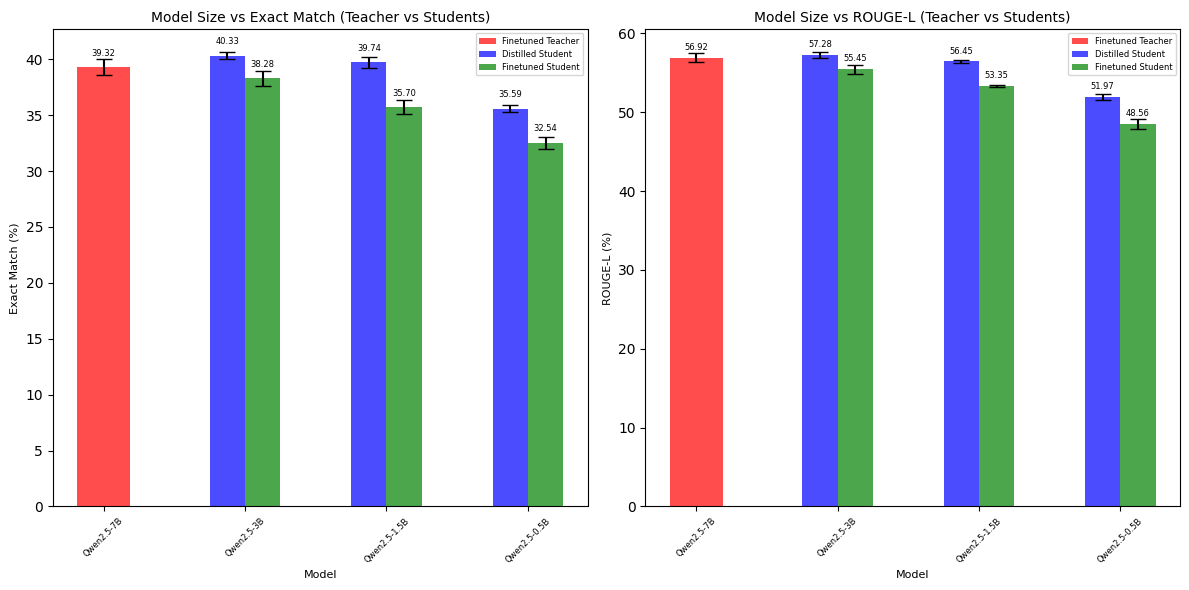

In [ ]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.en(zero-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 39.32
teacher_exact_match_std = 0.6985
distilled_exact_match = [40.33, 39.74, 35.59]
distilled_exact_match_std = [0.3141, 0.4904, 0.3294]
finetuned_exact_match = [38.28, 35.697, 32.54]
finetuned_exact_match_std = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 56.92
teacher_rouge_l_std = 0.5867
distilled_rouge_l = [57.28, 56.45, 51.97]
distilled_rouge_l_std = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l = [55.45, 53.35, 48.56]
finetuned_rouge_l_std = [0.5631, 0.1550, 0.6207]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

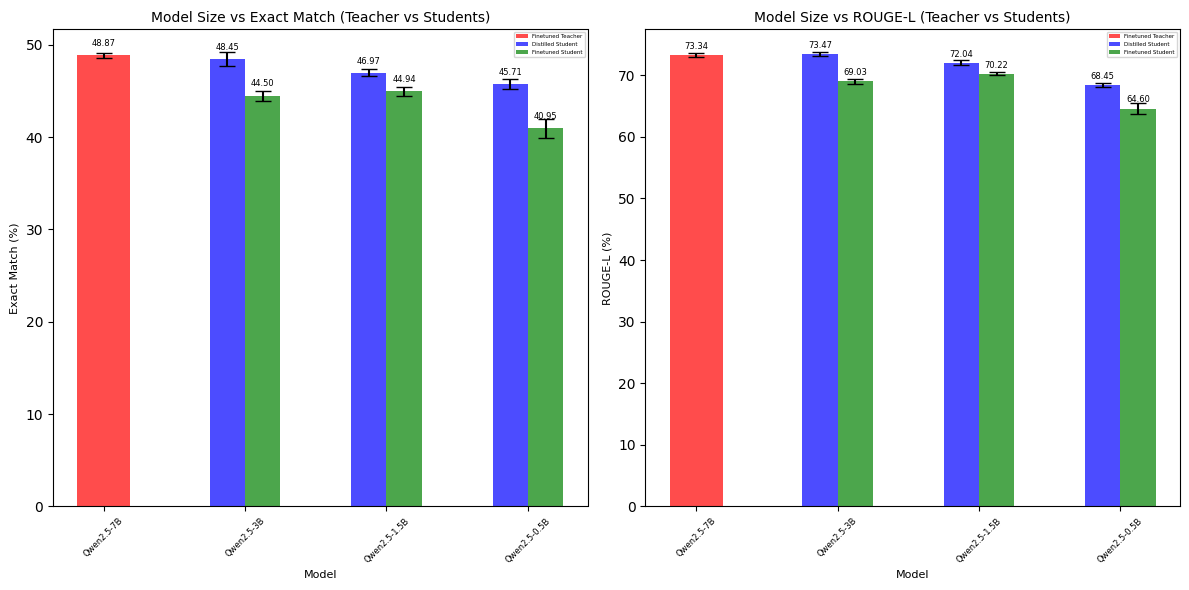

In [11]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.en(one-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 48.87
teacher_exact_match_std = 0.2815
distilled_exact_match = [48.45, 46.97, 45.71]
distilled_exact_match_std = [0.7616, 0.3720, 0.5398]
finetuned_exact_match = [44.50, 44.94, 40.95]
finetuned_exact_match_std = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 73.34
teacher_rouge_l_std = 0.3003
distilled_rouge_l = [73.47, 72.04, 68.45]
distilled_rouge_l_std = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l = [69.03, 70.22, 64.60]
finetuned_rouge_l_std = [0.4061, 0.2301, 0.91]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

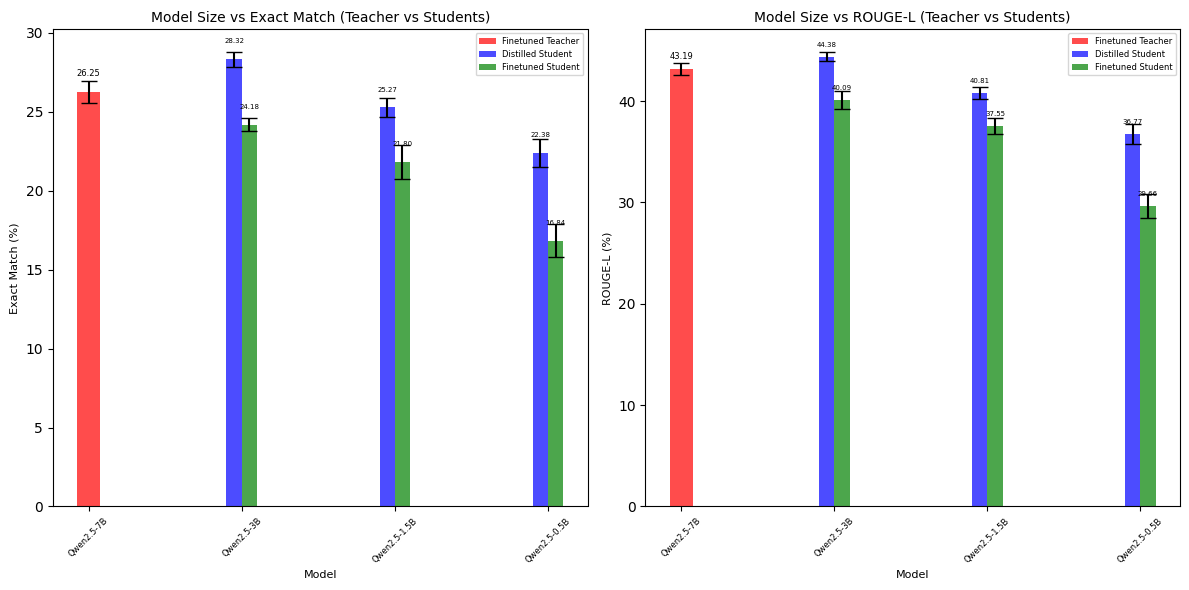

In [ ]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.de (zero-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 26.25
teacher_exact_match_std = 0.6709
distilled_exact_match = [28.32, 25.27, 22.38]
distilled_exact_match_std = [0.4580, 0.5956, 0.8691]
finetuned_exact_match = [24.18, 21.80, 16.84]
finetuned_exact_match_std = [0.4003, 1.0927, 1.0464]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 43.19
teacher_rouge_l_std = 0.6050
distilled_rouge_l = [44.38, 40.81, 36.77]
distilled_rouge_l_std = [0.4573, 0.5984, 0.9891]
finetuned_rouge_l = [40.086, 37.55, 29.66]
finetuned_rouge_l_std = [0.8715, 0.7945, 1.1512]

# Bar width
bar_width = 0.1
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=5)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=5)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=5)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

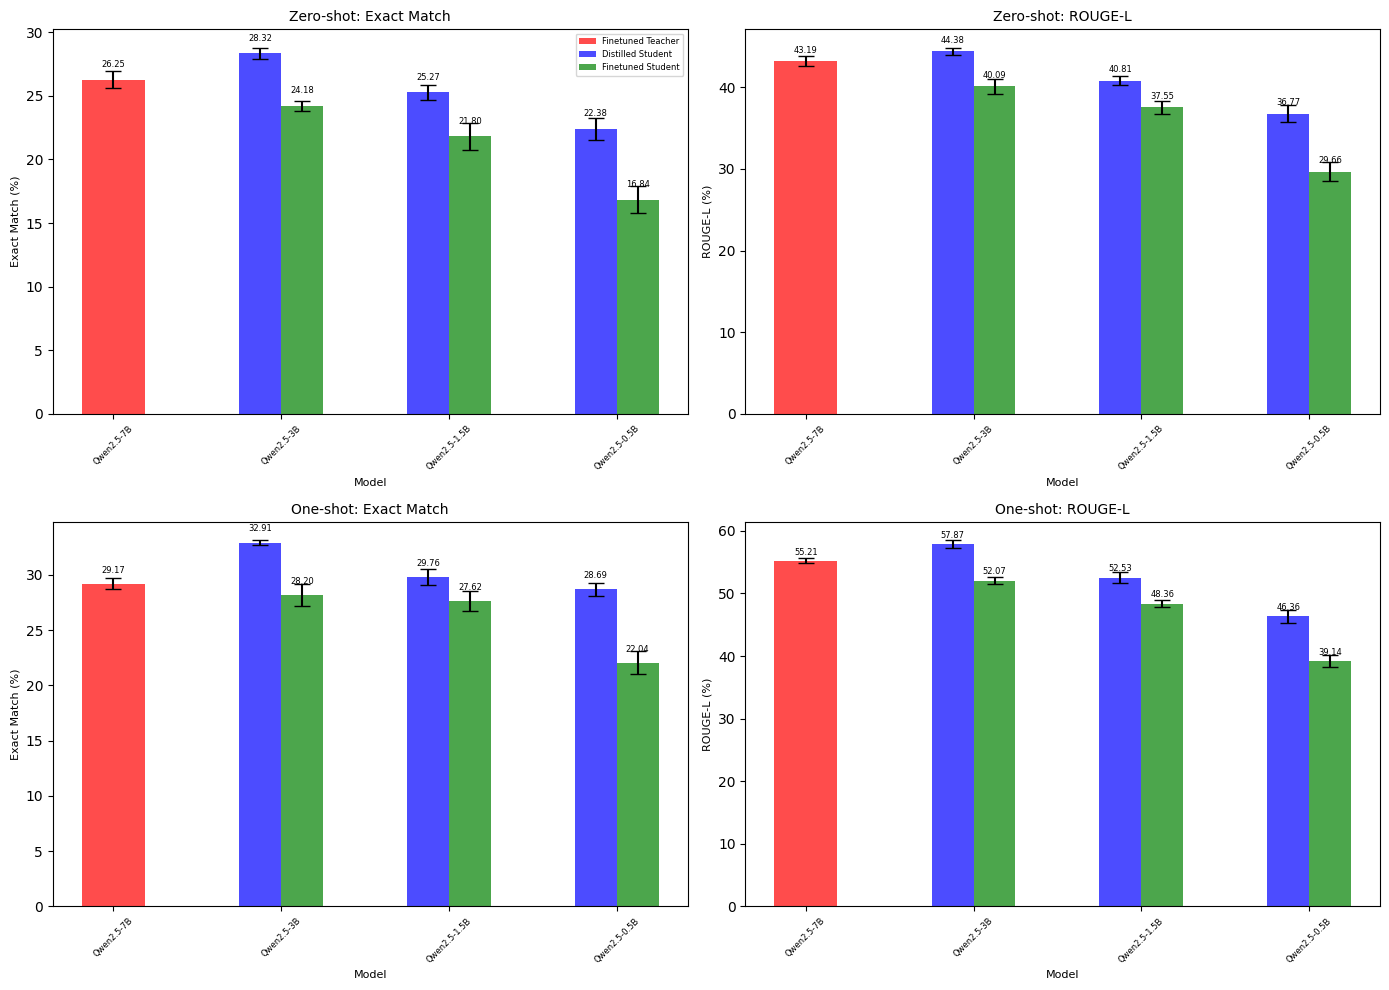

In [9]:
############### Model:Qwen2.5, Dataset:MLQA(de), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 10))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 26.25
teacher_exact_match_std_zero = 0.6709
distilled_exact_match_zero = [28.32, 25.27, 22.38]
distilled_exact_match_std_zero = [0.4580, 0.5956, 0.8691]
finetuned_exact_match_zero = [24.18, 21.80, 16.84]
finetuned_exact_match_std_zero = [0.4003, 1.0927, 1.0464]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 43.19
teacher_rouge_l_std_zero = 0.6050
distilled_rouge_l_zero = [44.38, 40.81, 36.77]
distilled_rouge_l_std_zero = [0.4573, 0.5984, 0.9891]
finetuned_rouge_l_zero = [40.086, 37.55, 29.66]
finetuned_rouge_l_std_zero = [0.8715, 0.7945, 1.1512]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.set_xlabel('Model', fontsize=8)
ax1.set_ylabel('Exact Match (%)', fontsize=8)
ax1.set_title('Zero-shot: Exact Match', fontsize=10)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=6)
ax1.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.set_xlabel('Model', fontsize=8)
ax2.set_ylabel('ROUGE-L (%)', fontsize=8)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=10)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 29.17
teacher_exact_match_std_one = 0.4974
distilled_exact_match_one = [32.91, 29.76, 28.69]
distilled_exact_match_std_one = [0.2171, 0.7200, 0.5795]
finetuned_exact_match_one = [28.20, 27.62, 22.04]
finetuned_exact_match_std_one = [1.0066, 0.9306, 1.0212]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 55.21
teacher_rouge_l_std_one = 0.4045
distilled_rouge_l_one = [57.87, 52.53, 46.36]
distilled_rouge_l_std_one = [0.6468, 0.8322, 1.0680]
finetuned_rouge_l_one = [52.07, 48.36, 39.14]
finetuned_rouge_l_std_one = [0.5407, 0.5307, 0.9545]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.set_xlabel('Model', fontsize=8)
ax3.set_ylabel('Exact Match (%)', fontsize=8)
ax3.set_title('One-shot: Exact Match', fontsize=10)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.set_xlabel('Model', fontsize=8)
ax4.set_ylabel('ROUGE-L (%)', fontsize=8)
ax4.set_title('One-shot: ROUGE-L', fontsize=10)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

plt.tight_layout()
plt.show()


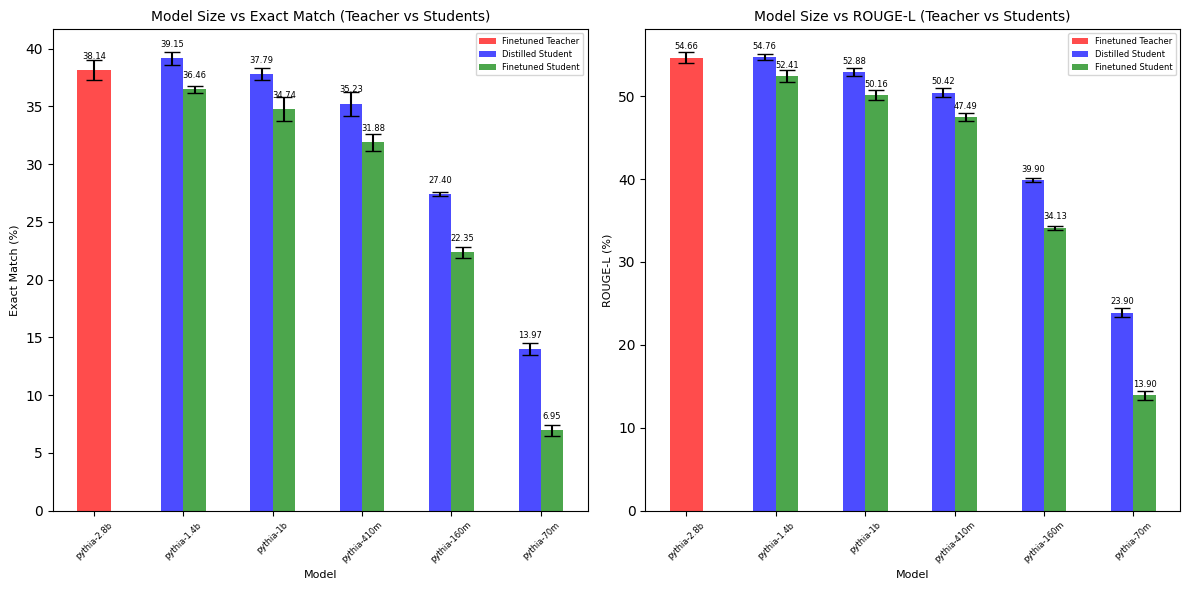

In [29]:
###################### visualizing mean and standard deviation (pythia, dataset: MLQA.en(zero-shot)) ####################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 38.14
teacher_exact_match_std = 0.8364
distilled_exact_match = [39.15, 37.79, 35.23, 27.40, 13.97]
distilled_exact_match_std = [0.5355, 0.5094, 1.0554, 0.1582, 0.5320]
finetuned_exact_match = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_exact_match_std = [0.3177, 1.0496, 0.7077, 0.4551, 0.4747]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 54.66
teacher_rouge_l_std = 0.6524
distilled_rouge_l = [54.76, 52.88, 50.42, 39.90, 23.90]
distilled_rouge_l_std = [0.3462, 0.4863, 0.5604, 0.2325, 0.5313]
finetuned_rouge_l = [52.41, 50.16, 47.49, 34.13, 13.90]
finetuned_rouge_l_std = [0.7279, 0.6022, 0.5258, 0.2383, 0.5538]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

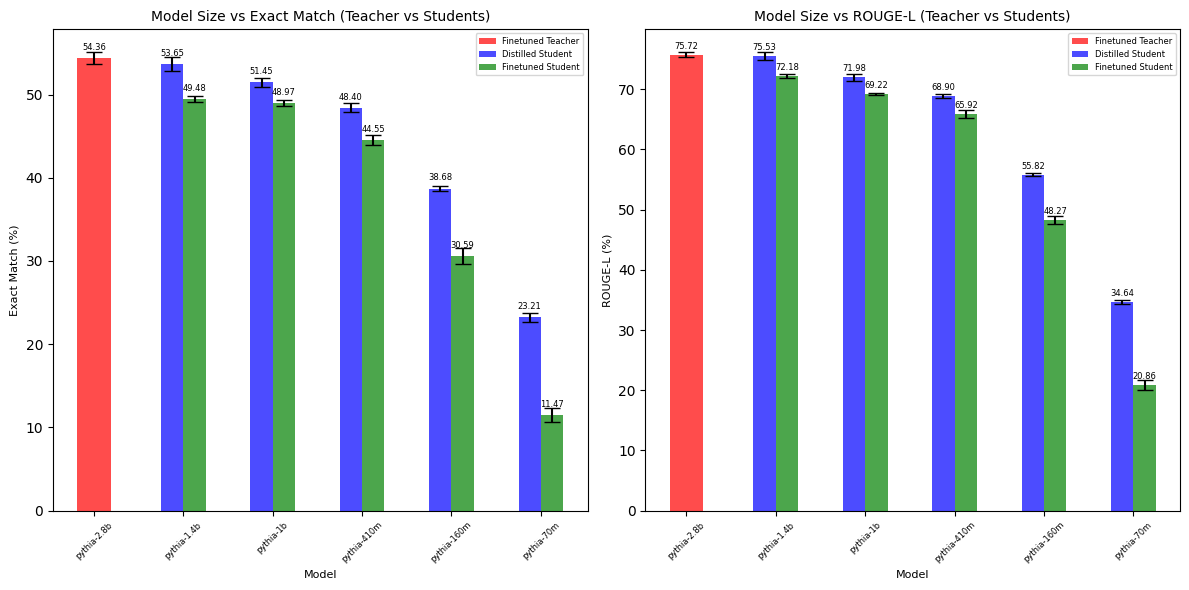

In [13]:
###################### visualizing mean and standard deviation (pythia, dataset: MLQA.en(one-shot)) ####################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 54.36
teacher_exact_match_std = 0.7205
distilled_exact_match = [53.65, 51.45, 48.40, 38.68, 23.21]
distilled_exact_match_std = [0.8535, 0.5909, 0.5425, 0.3142, 0.5166]
finetuned_exact_match = [49.48, 48.97, 44.55, 30.59, 11.47]
finetuned_exact_match_std = [0.3284, 0.3907, 0.5932, 0.9464, 0.8084]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 75.72
teacher_rouge_l_std = 0.4178
distilled_rouge_l = [75.53, 71.98, 68.90, 55.82, 34.64]
distilled_rouge_l_std = [0.6309, 0.5225, 0.2906, 0.2051, 0.3884]
finetuned_rouge_l = [72.18, 69.22, 65.92, 48.27, 20.86]
finetuned_rouge_l_std = [0.3453, 0.2098, 0.6966, 0.6726, 0.9090]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

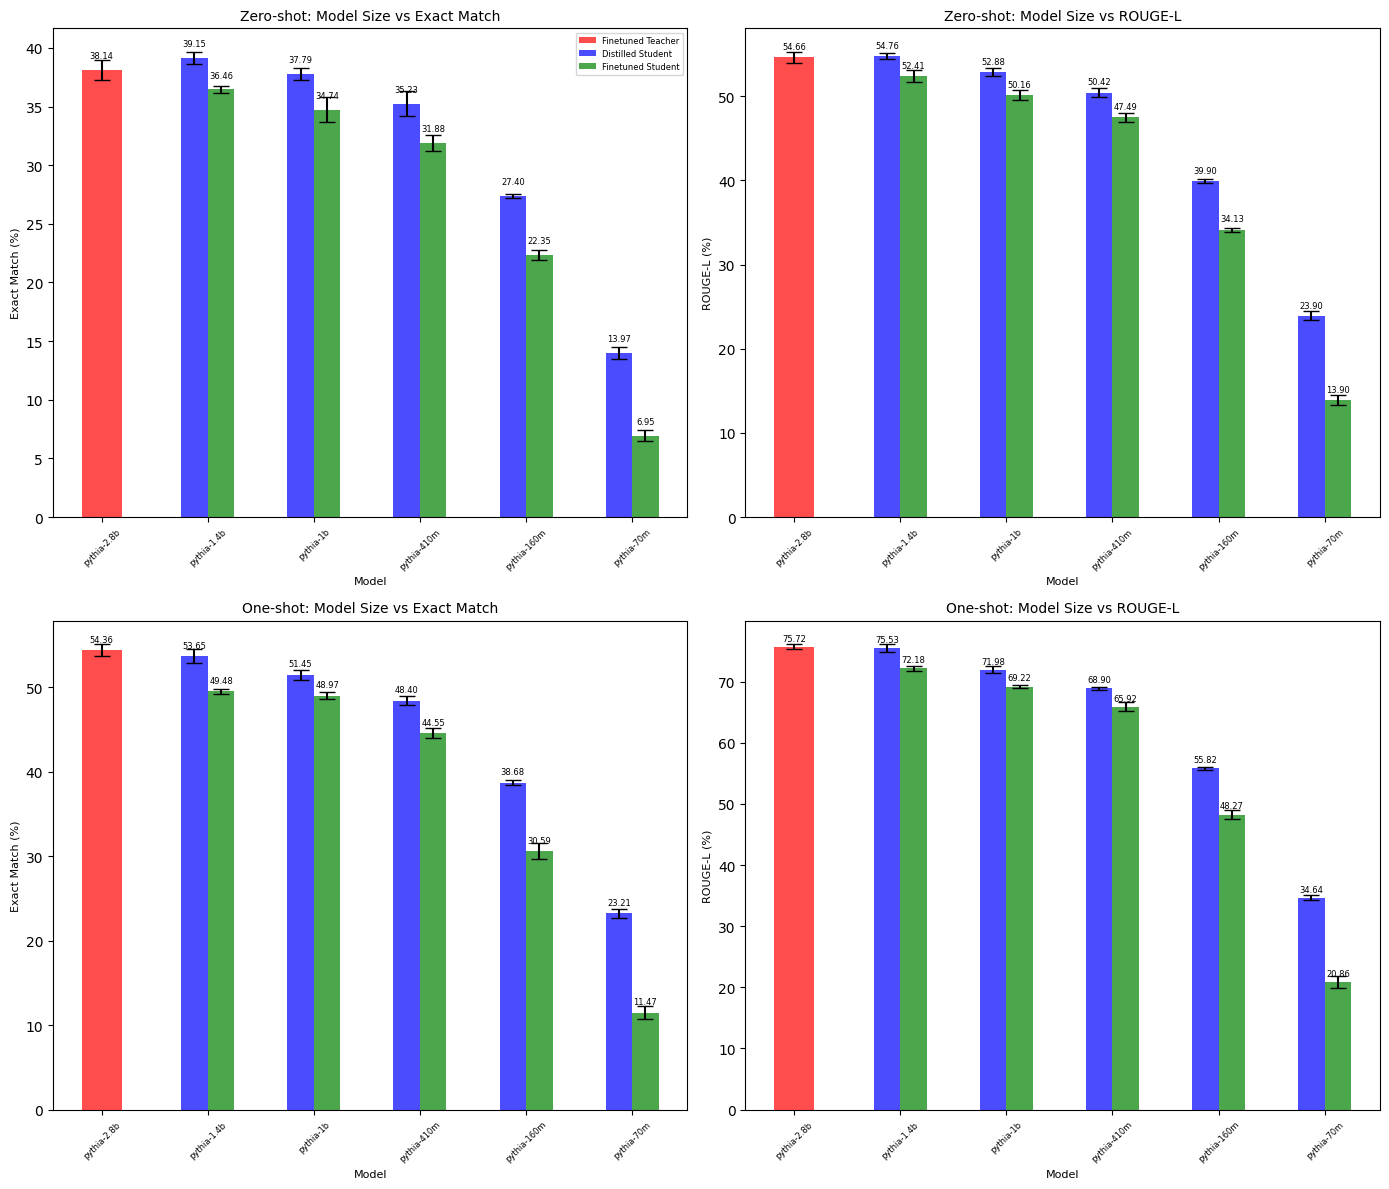

In [ ]:
############### Model:Pythia, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 38.14
teacher_exact_match_std_zero = 0.8364
distilled_exact_match_zero = [39.15, 37.79, 35.23, 27.40, 13.97]
distilled_exact_match_std_zero = [0.5355, 0.5094, 1.0554, 0.1582, 0.5320]
finetuned_exact_match_zero = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_exact_match_std_zero = [0.3177, 1.0496, 0.7077, 0.4551, 0.4747]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 54.66
teacher_rouge_l_std_zero = 0.6524
distilled_rouge_l_zero = [54.76, 52.88, 50.42, 39.90, 23.90]
distilled_rouge_l_std_zero = [0.3462, 0.4863, 0.5604, 0.2325, 0.5313]
finetuned_rouge_l_zero = [52.41, 50.16, 47.49, 34.13, 13.90]
finetuned_rouge_l_std_zero = [0.7279, 0.6022, 0.5258, 0.2383, 0.5538]

# Plot Exact Match Scores (Zero-shot)
plt.subplot(2, 2, 1)
plt.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Zero-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match_zero + 1, f'{teacher_exact_match_zero:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match_zero):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match_zero):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (Zero-shot)
plt.subplot(2, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Zero-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l_zero + 1, f'{teacher_rouge_l_zero:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l_zero):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l_zero):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 54.36
teacher_exact_match_std_one = 0.7205
distilled_exact_match_one = [53.65, 51.45, 48.40, 38.68, 23.21]
distilled_exact_match_std_one = [0.8535, 0.5909, 0.5425, 0.3142, 0.5166]
finetuned_exact_match_one = [49.48, 48.97, 44.55, 30.59, 11.47]
finetuned_exact_match_std_one = [0.3284, 0.3907, 0.5932, 0.9464, 0.8084]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 75.72
teacher_rouge_l_std_one = 0.4178
distilled_rouge_l_one = [75.53, 71.98, 68.90, 55.82, 34.64]
distilled_rouge_l_std_one = [0.6309, 0.5225, 0.2906, 0.2051, 0.3884]
finetuned_rouge_l_one = [72.18, 69.22, 65.92, 48.27, 20.86]
finetuned_rouge_l_std_one = [0.3453, 0.2098, 0.6966, 0.6726, 0.9090]

# Plot Exact Match Scores (One-shot)
plt.subplot(2, 2, 3)
plt.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('One-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match_one + 1, f'{teacher_exact_match_one:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match_one):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match_one):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (One-shot)
plt.subplot(2, 2, 4)
plt.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('One-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l_one + 1, f'{teacher_rouge_l_one:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l_one):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l_one):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

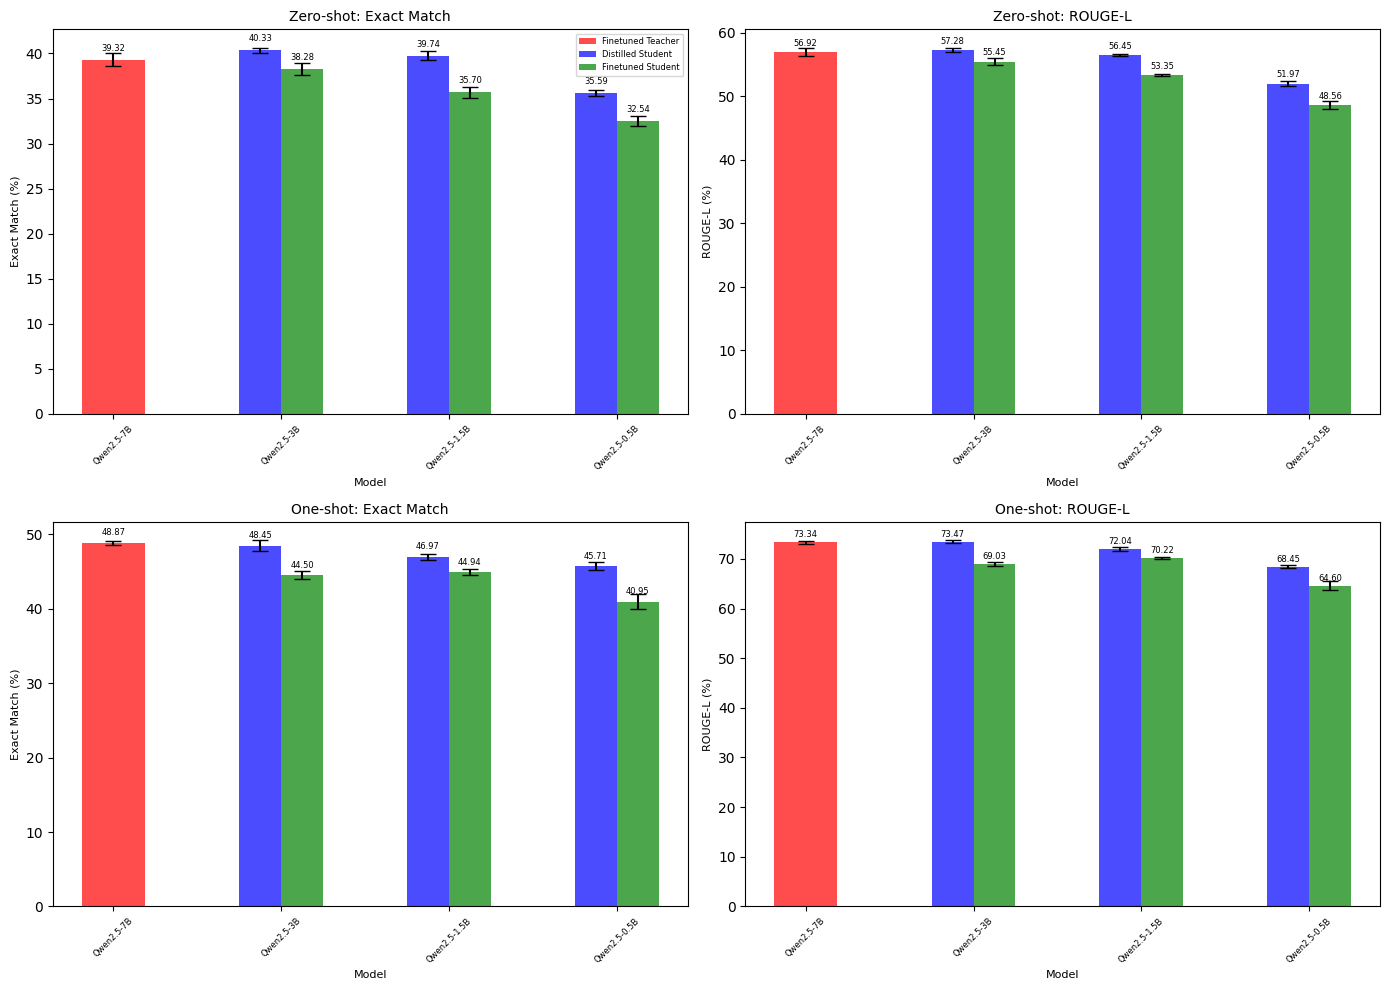

In [9]:
############### Model:Qwen2.5, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 10))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 39.32
teacher_exact_match_std_zero = 0.6985
distilled_exact_match_zero = [40.33, 39.74, 35.59]
distilled_exact_match_std_zero = [0.3141, 0.4904, 0.3294]
finetuned_exact_match_zero = [38.28, 35.697, 32.54]
finetuned_exact_match_std_zero = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 56.92
teacher_rouge_l_std_zero = 0.5867
distilled_rouge_l_zero = [57.28, 56.45, 51.97]
distilled_rouge_l_std_zero = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l_zero = [55.45, 53.35, 48.56]
finetuned_rouge_l_std_zero = [0.5631, 0.1550, 0.6207]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.set_xlabel('Model', fontsize=8)
ax1.set_ylabel('Exact Match (%)', fontsize=8)
ax1.set_title('Zero-shot: Exact Match', fontsize=10)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=6)
ax1.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.set_xlabel('Model', fontsize=8)
ax2.set_ylabel('ROUGE-L (%)', fontsize=8)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=10)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 48.87
teacher_exact_match_std_one = 0.2815
distilled_exact_match_one = [48.45, 46.97, 45.71]
distilled_exact_match_std_one = [0.7616, 0.3720, 0.5398]
finetuned_exact_match_one = [44.50, 44.94, 40.95]
finetuned_exact_match_std_one = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 73.34
teacher_rouge_l_std_one = 0.3003
distilled_rouge_l_one = [73.47, 72.04, 68.45]
distilled_rouge_l_std_one = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l_one = [69.03, 70.22, 64.60]
finetuned_rouge_l_std_one = [0.4061, 0.2301, 0.91]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.set_xlabel('Model', fontsize=8)
ax3.set_ylabel('Exact Match (%)', fontsize=8)
ax3.set_title('One-shot: Exact Match', fontsize=10)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.set_xlabel('Model', fontsize=8)
ax4.set_ylabel('ROUGE-L (%)', fontsize=8)
ax4.set_title('One-shot: ROUGE-L', fontsize=10)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

plt.tight_layout()
plt.show()


In [8]:
from datasets import load_dataset

dataset_rc = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

# Inspect the first sample to see the available keys
sample = dataset_rc['train'][0]

# Print out the keys of the sample
print(f"Available keys in the sample: {sample.keys()}")

# Now that you have the keys, inspect the elements for each key
for key, value in sample.items():
    print(f"{key}: {value}\n")


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Available keys in the sample: dict_keys(['question', 'question_id', 'question_source', 'entity_pages', 'search_results', 'answer'])
question: Which American-born Sinclair won the Nobel Prize for Literature in 1930?

question_id: tc_1

question_source: http://www.triviacountry.com/

entity_pages: {'doc_source': [], 'filename': [], 'title': [], 'wiki_context': []}

search_results: {'description': [], 'filename': [], 'rank': [], 'title': [], 'url': [], 'search_context': []}

answer: {'aliases': ['(Harry) Sinclair Lewis', 'Harry Sinclair Lewis', 'Lewis, (Harry) Sinclair', 'Grace Hegger', 'Sinclair Lewis'], 'normalized_aliases': ['grace hegger', 'lewis harry sinclair', 'harry sinclair lewis', 'sinclair lewis'], 'matched_wiki_entity_name': '', 'normalized_matched_wiki_entity_name': '', 'normalized_value': 'sinclair lewis', 'type': 'WikipediaEntity', 'value': 'Sinclair Lewis'}



In [2]:
from datasets import load_dataset

# Load the 'rc' split of TriviaQA from Hugging Face
dataset_rc = load_dataset("mandarjoshi/trivia_qa", "rc")

# Select a sample from the 'rc' split
sample = dataset_rc['train'][0]  

question = sample["question"]
answer = sample["answer"]["value"]

context = ' '.join(sample['search_results']['description']) if 'description' in sample['search_results'] else 'No context available'

# Combine question and context as raw input
raw_input = f"Question: {question} Context: {context}"

# Display the extracted data
print(f"Question: {question}")
print(f"Context: {context}")
print(f"Answer: {answer}")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Question: Which American-born Sinclair won the Nobel Prize for Literature in 1930?
Context: The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don’t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Awarded the Nobel Prize for Lit

In [9]:
################# trivia_qa (rc) #####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc")

# Function to extract the necessary fields from a sample
def extract_fields(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    # Join all search results descriptions into one string
    description = ' '.join(sample['search_results'].get('description', [])) if 'search_results' in sample else 'No description available'
    # Get the main answer value
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    return {
        'question_id': question_id,
        'question': question,
        'description': description,
        'answer': answer
    }

# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields(sample)
            f.write(json.dumps(extracted_data) + '\n')

save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc'  

os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['train'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'validation.jsonl'))
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'test.jsonl'))

print(f"Data saved successfully to {save_directory}.")


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc.


In [8]:
######################## trivi_qa (rc_nocontext) ####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

def extract_fields_nocontext(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    # Create a dictionary for each entry
    return {
        'question_id': question_id,
        'question': question,
        'answer': answer
    }

# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields_nocontext(sample)
            f.write(json.dumps(extracted_data) + '\n')

# Set the directory where you want to save the files
save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext' 

# Ensure the directory exists, if not, create it
os.makedirs(save_directory, exist_ok=True)

# Save the train, validation, and test splits
save_to_jsonl(dataset['train'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'validation.jsonl'))
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'test.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext.


In [3]:
################### trivia_qa: rc & rc_nocontext comparison ########################

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

examples_with_context = [
    {
        "question_id": "tc_1",
        "description": "The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don\u2019t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Awarded the Nobel Prize for Literature. ... In 1930, Lewis won the Nobel Prize in Literature, ... 1930, Sinclair Lewis ... Download Sinclair Lewis - Nobel Prize in Literature, 1930 ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) seeders: 4. leechers: 3. Download torrent.",
        "question": "Which American-born Sinclair won the Nobel Prize for Literature in 1930?",
        "answer": "Sinclair Lewis"
    },
    {
        "question_id": "tc_5",
        "description": "Song chart US Billboard. The Billboard magazine has published various music charts starting ... the first \"Music Hit Parade\" was published in 1936, ... Decade: Number ... The first British singles chart was published in the November 14, ... The Billboard Charts started in 1940, ... The results are published in Billboard magazine.",
        "question": "In which decade did Billboard magazine first publish and American hit chart?",
        "answer": "30s"
    },
    {
        "question_id": "tc_3",
        "description": "Judi Dench, Actress: Skyfall. Judi Dench was born in York, ... Judi Dench was born in York, England, to Eleanora Olive ... 2011 My Week with Marilyn Dame Sybil Thorndike. A short biography of Dame Judi Dench. Born and schooled in York England. A short biography of Dame Judi Dench. The York England born star ... Dame Judi created the ... Dame Judi Dench, original name in full Judith Olivia Dench (born December 9, 1934, York, North Yorkshire, England) ... Judi Dench biography, ... credits,quotes and more... Judi Dench was born on 9th December, 1934, in York, England. After gra... Search. Shows; News ... Dame Judi, aged ... Born: 12/09/1934 in York, England, GB. Jump to. Related Articles. ... Dame Judi Dench spent much of her career concentrating on stage and ... Met Judi's mother while ... Judi Dench was born in York, England, to Eleanora Olive ... Judi is the proud owner of a racehorse ... was named Dame Judi Dench Walk in honour of the city being ...",
        "question": "Where in England was Dame Judi Dench born?",
        "answer": "York"
    }
    
]

examples_without_context = [
    {
        "question_id": "tc_1",
        "question": "Which American-born Sinclair won the Nobel Prize for Literature in 1930?",
        "answer": "Sinclair Lewis"
    },
    {
        "question_id": "tc_3",
        "question": "Where in England was Dame Judi Dench born?",
        "answer": "York"
    },
    {
        "question_id": "tc_5",
        "question": "In which decade did Billboard magazine first publish and American hit chart?",
        "answer": "30s"
    }
    
]

def prepare_input(sample, with_context=True):
    if with_context:
        return (
            "Please provide a concise answer to the question based on the context below.\n\n"
            f"Context:\n{sample['description']}\n\n"
            f"Question:\n{sample['question']}\n"
            "Answer:"
        )
    else:
        return (
            "Please provide a concise answer to the question below.\n\n"
            f"Question:\n{sample['question']}\n"
            "Answer:"
        )

model_name = 'EleutherAI/pythia-2.8b'  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def generate_output(model, tokenizer, input_text, max_new_tokens=30):
    inputs = tokenizer(input_text, return_tensors='pt').to(device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        early_stopping=True
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = generated_text[len(input_text):].strip()
    return answer

# Generate outputs with context
outputs_with_context = []
for sample in examples_with_context:
    input_text = prepare_input(sample, with_context=True)
    output = generate_output(model, tokenizer, input_text)
    outputs_with_context.append({
        'input_text': input_text,
        'model_output': output,
        'reference_answer': sample['answer']
    })

# Generate outputs without context
outputs_without_context = []
for sample in examples_without_context:
    input_text = prepare_input(sample, with_context=False)
    output = generate_output(model, tokenizer, input_text)
    outputs_without_context.append({
        'input_text': input_text,
        'model_output': output,
        'reference_answer': sample['answer']
    })

# Display the results
print("Outputs with Context:\n")
for result in outputs_with_context:
    print(f"Input Text:\n{result['input_text']}\n")
    print(f"Model Output:\n{result['model_output']}\n")
    print(f"Reference Answer:\n{result['reference_answer']}\n")
    print("-" * 80)

print("\nOutputs without Context:\n")
for result in outputs_without_context:
    print(f"Input Text:\n{result['input_text']}\n")
    print(f"Model Output:\n{result['model_output']}\n")
    print(f"Reference Answer:\n{result['reference_answer']}\n")
    print("-" * 80)


Outputs with Context:

Input Text:
Please provide a concise answer to the question based on the context below.

Context:
The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don’t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Aw

In [2]:
from datasets import load_dataset

dataset_info = load_dataset("facebook/mlqa", "mlqa.de.de")
sample = dataset_info['test'][0]

# Print the available splits
print(dataset_info, sample)

DatasetDict({
    test: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 11590
    })
    validation: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 1148
    })
}) {'context': 'In 1994, five unnamed civilian contractors and the widows of contractors Walter Kasza and Robert Frost sued the USAF and the United States Environmental Protection Agency. Their suit, in which they were represented by George Washington University law professor Jonathan Turley, alleged they had been present when large quantities of unknown chemicals had been burned in open pits and trenches at Groom. Biopsies taken from the complainants were analyzed by Rutgers University biochemists, who found high levels of dioxin, dibenzofuran, and trichloroethylene in their body fat. The complainants alleged they had sustained skin, liver, and respiratory injuries due to their work at Groom, and that this had contributed to the deaths of Frost and

In [4]:
import json
from datasets import load_dataset
import os

dataset = load_dataset("facebook/mlqa", "mlqa.en.en")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    #answers = data.get('answers', '')
    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
        
    return {
        #"instruction": "Please answer the following question based on the given context.",
        #'prompt': prompt,
        'id': id,
        'context': context,
        'question': question,
        'answer': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/english' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['test'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/mlqa/english.


In [1]:
import json
from datasets import load_dataset
import os

dataset = load_dataset("facebook/mlqa", "mlqa.de.de")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
        
    return {
        #"instruction": "Please answer the following question based on the given context.",
        #'prompt': prompt,
        #'answer': answer
        'id': id,
        'context': context,
        'question': question,
        'answer': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/deutsch' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['test'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/mlqa/deutsch.


In [15]:
########################## Formatting validation data ###########################

import json
from datasets import load_dataset
import os

#dataset = load_dataset("facebook/mlqa", "mlqa.en.en")
#dataset = load_dataset("facebook/mlqa", "mlqa.de.de")
dataset = load_dataset("rajpurkar/squad_v2")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    #answers = data.get('answers', '')

    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
    
    #prompt = f"<|im_start|>Context: {context}\n\nQuestion: {question}\n\nAnswer:<|im_end|>"
    prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
        
    return {
        'id': id,
        'prompt': prompt,
        #'context': context,
        #'question': question,
        'output': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/english' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/deutsch' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_json' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english'
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch' 
save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_1shot' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/squad_1shot.


In [1]:
######################## trivi_qa (rc_nocontext) ####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

def extract_fields_nocontext(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    prompt = f"Question: {question}\n\nAnswer:"
    
    # Create a dictionary for each entry
    return {
        'question_id': question_id,
        'prompt': prompt,
        'output': answer
    }
# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields_nocontext(sample)
            f.write(json.dumps(extracted_data) + '\n')

# Set the directory where you want to save the files
save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext' 

# Ensure the directory exists, if not, create it
os.makedirs(save_directory, exist_ok=True)

# Save the train, validation, and test splits
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext.


In [8]:
################### exact_match & rougel-score calculation #####################

import numpy as np

exact_match_scores = [27.9126, 28.6408, 29.1262, 28.3981, 29.3689]
rouge_l_scores = [45.2792, 45.4621, 46.9633, 46.2532, 47.8476]
exact_match_array = np.array(exact_match_scores)
rouge_l_array = np.array(rouge_l_scores)

exact_match_mean = exact_match_array.mean()
exact_match_std = exact_match_array.std(ddof=1)

rouge_l_mean = rouge_l_array.mean()
rouge_l_std = rouge_l_array.std(ddof=1)

# Display the results
print(f"Exact Match Mean: {exact_match_mean:.4f}, Standard Deviation: {exact_match_std:.4f}")
print(f"Rouge-L Mean: {rouge_l_mean:.4f}, Standard Deviation: {rouge_l_std:.4f}")


Exact Match Mean: 28.6893, Standard Deviation: 0.5795
Rouge-L Mean: 46.3611, Standard Deviation: 1.0680


In [16]:
################################ Few-shot Learning Dataset #############################

import random
import json

#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/train.jsonl' 
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/valid.jsonl'
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'

with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

few_shot_examples = random.sample(data, 100) 

#output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/random_samples.jsonl' 
output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl'
with open(output_path, 'w') as file:
    for example in few_shot_examples:
        file.write(json.dumps(example) + '\n')


In [17]:
####################### creating few-shot templates ############################

import random
import json

# Load the sampled few-shot examples
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/random_samples.jsonl'
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/eval_random_samples.jsonl' 
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/eval_random_samples.jsonl' 
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/eval_random_samples.jsonl' 
sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl' 

with open(sampled_examples_path, 'r') as file:
    sampled_examples = [json.loads(line) for line in file]

num_templates = 100
examples_per_template = 1 

few_shot_templates = []
for _ in range(num_templates):
    selected_examples = random.sample(sampled_examples, examples_per_template)
    
    # Format the selected examples as a single prompt template
    template_prompt = ""
    for i, example in enumerate(selected_examples, start=1):
        template_prompt += f"{i}:\n{example['prompt']}\nAnswer: {example['output']}\n\n"
    
    # Append placeholders for the current instance's context and question
    template_prompt += "Current:\nContext: [Your main context here]\nQuestion: [Your main question here]\nAnswer:"
    
    # Store the template
    few_shot_templates.append(template_prompt)

# Save the templates if needed
#templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/one_shot_templates.jsonl' 
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/eval_shot_templates.jsonl'
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/eval_1shot_templates.jsonl'
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/eval_1shot_templates.jsonl'
templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_1shot_templates.jsonl'

with open(templates_path, 'w') as file:
    for template in few_shot_templates:
        file.write(json.dumps({"template": template}) + '\n')

In [5]:
import random
from transformers import AutoTokenizer
import json

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

# Load the main dataset (jsonl format)
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/train.jsonl'
with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/one_shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Extract questions from the few-shot templates
template_questions = set()
for template in sampled_templates:
    # Extract the question after "Question:" and before "Answer:" in the template
    question_part = template['template'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()
    template_questions.add(question_part)

# Define seeds for generating different dataset versions
seeds = [42, 100, 2024]

# Generate datasets for each seed
for seed in seeds:
    random.seed(seed)
    
    # Augment each dataset instance with a few-shot template
    augmented_data = []
    for i, entry in enumerate(data):
        # Extract question from the "prompt" field in the main dataset entry
        question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()
        
        # Skip entries that have questions in the few-shot templates
        if question in template_questions:
            continue
        
        # Select a template by rotating through the list
        template = sampled_templates[i % len(sampled_templates)]['template']
        
        # Extract context from the main dataset entry
        context = entry['prompt'].split("\n\nQuestion: ")[0].replace("Context: ", "")

        # Replace placeholders with actual context and question
        formatted_prompt = template.replace("[Your main context here]", context) \
                                   .replace("[Your main question here]", question)
                                   
                        
        # Tokenize the final formatted prompt to get its length
        prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)
        
        # Skip this entry if the tokenized prompt length is greater than 2048
        if len(prompt_tokens) > 1700:
            print(f"Skipping entry with ID {entry.get('id')} due to length > 2048 tokens.")
            continue
        
        # Create a new entry with the formatted prompt
        augmented_entry = {
            "id": entry.get("id", i), 
            "prompt": formatted_prompt,
            "output": entry["output"]
        }
        augmented_data.append(augmented_entry)
    
    # Save the augmented dataset for the current seed
    output_path = f'/home/IAIS/jdatta/distillm-new/data/squad_1shot/mlqa_en_seed_{seed}.jsonl'
    with open(output_path, 'w') as file:
        for entry in augmented_data:
            file.write(json.dumps(entry) + '\n')

In [14]:
####################### creating dataset with one shot templates ##########################

import json
from transformers import AutoTokenizer
import unicodedata

# Initialize the tokenizer for Qwen2 model
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")
#tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")


# Load the main dataset (jsonl format)
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/train.jsonl'
with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/one_shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Define seeds for generating different dataset versions
seeds = [42, 100, 2024]

# Generate datasets for each seed
for seed in seeds:
    random.seed(seed)
    augmented_data = []
    
    augmented_data = []
    for i, entry in enumerate(data):
        # Extract question from the "prompt" field in the main dataset entry
        question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()

        
        # Select a template by rotating through the list
        template = sampled_templates[i % len(sampled_templates)]['template']
        
        # Extract and clean context from the main dataset entry
        context = entry['prompt'].split("Question: ")[0].replace("<|im_start|>Context: ", "").strip()
        
        # Replace placeholders with actual context and question, adding <|im_start|> and <|im_end|> tokens around them
        formatted_prompt = template.replace("[Your main context here]", f"<|im_start|>Context: {context}<|im_end|>") \
                                   .replace("[Your main question here]", f"<|im_start|>Question: {question}<|im_end|>")

        # Tokenize the final formatted prompt to get its length
        prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)
        
        # Skip this entry if the tokenized prompt length is greater than 2048
        if len(prompt_tokens) > 2000:
            print(f"Skipping entry with ID {entry.get('id')} due to length > 2048 tokens.")
            continue
        
        # Create a new augmented entry with the formatted prompt
        augmented_entry = {
            "id": entry.get("id", i), 
            "prompt": formatted_prompt,
            "output": entry["output"]
        }
        augmented_data.append(augmented_entry)

    # Save the augmented dataset for the current seed
    output_path = f'/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/squad_seed_{seed}.jsonl'
    with open(output_path, 'w') as file:
        for entry in augmented_data:
            file.write(json.dumps(entry) + '\n')

In [19]:
######################## for skipping same entries after adding few-shot templates #################

import json

# Paths to the datasets
main_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'
reference_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl' 
output_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl' 

# Load the reference dataset and extract IDs
with open(reference_dataset_path, 'r') as file:
    reference_data = [json.loads(line) for line in file]
reference_ids = set(entry['id'] for entry in reference_data)

# Load the main dataset and filter out entries with matching IDs in the reference dataset
filtered_data = []
with open(main_dataset_path, 'r') as file:
    for line in file:
        entry = json.loads(line)
        if entry['id'] not in reference_ids:  # Only keep entries whose IDs are not in the reference set
            filtered_data.append(entry)

# Save the filtered dataset
with open(output_dataset_path, 'w') as file:
    for entry in filtered_data:
        file.write(json.dumps(entry) + '\n')

print(f"Filtered dataset saved to {output_dataset_path}.")
print(f"Number of entries removed: {len(reference_ids)}")
print(f"Number of entries in the filtered dataset: {len(filtered_data)}")

Filtered dataset saved to /home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl.
Number of entries removed: 100
Number of entries in the filtered dataset: 11773


In [18]:
###################### for validation data (few-shot templates) #############################

import json
from transformers import AutoTokenizer
import unicodedata

# Initialize the tokenizer for the model (e.g., Qwen2 or Pythia)
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")
#tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")

# Load the main dataset (jsonl format)
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/valid.jsonl'
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'

with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_1shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Generate a single dataset
augmented_data = []
for i, entry in enumerate(data):
    # Extract question from the "prompt" field in the main dataset entry
    question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()

    # Select a template by rotating through the list
    template = sampled_templates[i % len(sampled_templates)]['template']

    # Extract and clean context from the main dataset entry
    context = entry['prompt'].split("\n\nQuestion: ")[0].replace("Context: ", "")

    # Replace placeholders with actual context and question
    formatted_prompt = template.replace("[Your main context here]", context) \
                               .replace("[Your main question here]", question)

    # Tokenize the final formatted prompt to get its length
    prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)

    # Skip this entry if the tokenized prompt length is greater than 1700
    if len(prompt_tokens) > 1500:
        print(f"Skipping entry with ID {entry.get('id')} due to length > 1700 tokens.")
        continue

    # Create a new augmented entry with the formatted prompt
    augmented_entry = {
        "id": entry.get("id", i),
        "prompt": formatted_prompt,
        "output": entry["output"]
    }
    augmented_data.append(augmented_entry)

# Save the augmented dataset
output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'
with open(output_path, 'w') as file:
    for entry in augmented_data:
        file.write(json.dumps(entry) + '\n')

print(f"Augmented dataset saved at {output_path}")

Augmented dataset saved at /home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl


In [2]:
from transformers import AutoTokenizer

# Replace 'EleutherAI/pythia-1b' with the specific model name you're using
tokenizer = AutoTokenizer.from_pretrained('Qwen/Qwen2.5-1.5B')

# Data for a single instance
data_instance = {"prompt": "Context: Die exekutive Macht der Krone wird mit dem Sammelbegriff Royal Prerogative (Hoheitsrecht) umschrieben. Aufgrund der zahlreichen Einschr\u00e4nkungen \u00fcbt der Monarch seine Hoheitsrechte ausschlie\u00dflich auf Anraten von Ministern aus, die dem Parlament gegen\u00fcber verantwortlich sind. In den meisten F\u00e4llen ist es der Premierminister oder der Privy Council, wobei letzterer heute vom Kabinett kontrolliert wird. Der Monarch trifft sich w\u00f6chentlich zu Sitzungen mit dem Premierminister. Es steht ihm zu, seine Meinung zu \u00e4u\u00dfern, muss aber letztlich die Entscheidungen des Premierministers und des Kabinetts akzeptieren (unter der Voraussetzung, dass sie im Unterhaus \u00fcber die Mehrheit verf\u00fcgen). Gem\u00e4\u00df Walter Bagehot besitzt der Monarch in einer konstitutionellen Monarchie drei Rechte, \u201edas Recht angeh\u00f6rt zu werden, das Recht zu ermutigen und das Recht zu warnen.\u201cObschon die Hoheitsrechte weitreichend sind und f\u00fcr deren Aus\u00fcbung die Zustimmung des Parlaments nicht erforderlich ist, sind sie dennoch begrenzt. Zahlreiche Hoheitsrechte werden nicht mehr angewendet, sind faktisch auf den Premierminister \u00fcbergegangen oder wurden dauerhaft an das Parlament \u00fcbertragen. Beispielsweise ist es dem Monarchen nicht gestattet, neue Steuern zu erheben und einzutreiben. Eine solche Aktion ben\u00f6tigt zwingend die Genehmigung des Parlaments. Gem\u00e4\u00df einem parlamentarischen Bericht aus dem Jahr 2002 \u201ekann die Krone keine neuen Hoheitsrechte einf\u00fchren\u201c und das Parlament kann durch Beschluss eines Gesetzes jegliche Hoheitsrechte aufheben.Es ist das Hoheitsrecht des Monarchen, das Parlament einzuberufen, zu vertagen und aufzul\u00f6sen. Jede Parlamentssession beginnt mit der Einberufung durch den Monarchen. Es folgt die Parlamentser\u00f6ffnung (State Opening of Parliament), bei der er im Saal des House of Lords die Thronrede h\u00e4lt und dabei die Legislaturziele der Regierung bekanntgibt. Die Vertagung geschieht \u00fcblicherweise ein Jahr nach Beginn der Session und beendet diese formell. Auf die Aufl\u00f6sung, die eine Legislaturperiode beendet, folgen Wahlen f\u00fcr alle Sitze des Unterhauses. Der Zeitpunkt der Aufl\u00f6sung wird durch verschiedene Faktoren beeinflusst. So darf eine Legislaturperiode nicht l\u00e4nger als f\u00fcnf Jahre dauern; gem\u00e4\u00df dem Parliament Act von 1911 erfolgt die Aufl\u00f6sung in diesem Falle automatisch.In der Regel ist es aber so, dass der Premierminister jenen Moment w\u00e4hlt, der f\u00fcr seine Partei die g\u00fcnstigsten Aussichten verspricht. Gem\u00e4\u00df den 1950 aufgestellten Lascelles-Prinzipien (benannt nach Alan Lascelles, dem Privatsekret\u00e4r von George VI.) kann der Monarch theoretisch die Parlamentsaufl\u00f6sung verweigern, doch die Voraussetzungen, unter denen eine solche Aktion gerechtfertigt w\u00e4re, sind unklar. Bevor ein durch beide Parlamentskammern verabschiedetes Gesetz in Kraft treten kann, ist die formelle Zustimmung des Monarchen (Royal Assent) erforderlich. Theoretisch kann der Monarch seine Zustimmung geben oder verweigern, doch ist letzteres seit 1707 nicht mehr geschehen, als K\u00f6nigin Anne ein Gesetz \u00fcber B\u00fcrgerwehren in Schottland zur\u00fcckwies.Zu den Regionalregierungen von Schottland, Wales und Nordirland besteht eine \u00e4hnliche Beziehung. Der Monarch ernennt den First Minister Schottlands (First Minister of Scotland) gem\u00e4\u00df der Nomination durch das Schottische Parlament und den First Minister von Wales (First Minister of Wales) gem\u00e4\u00df der Nomination durch die Nationalversammlung f\u00fcr Wales. In Angelegenheiten, die Schottland betreffen, handelt er auf Anraten der schottischen Regierung. Da die Autonomie in Wales weniger weitreichend ist, handelt der Monarch in walisischen Angelegenheiten auf Anraten des Premierministers und des Kabinetts des Vereinigten K\u00f6nigreichs. Der Monarch kann gegen jedes von der Northern Ireland Assembly beschlossene Gesetz das Veto einlegen, wenn der Nordirland-Minister es f\u00fcr verfassungswidrig h\u00e4lt.Theoretisch kann der Monarch die Staatsverwaltung regeln, Reisep\u00e4sse ausstellen, Krieg erkl\u00e4ren, Frieden schlie\u00dfen, Truppen anf\u00fchren sowie Abkommen, Allianzen und internationale Vereinbarungen aushandeln und ratifizieren. Ein Abkommen darf jedoch keine Auswirkungen auf Gesetze des Vereinigten K\u00f6nigreichs haben; in diesem Falle ist ein Parlamentsbeschluss notwendig. Der Monarch ist Oberbefehlshaber der Streitkr\u00e4fte, bestehend aus British Army, Royal Navy und Royal Air Force. Er akkreditiert Botschafter und Hochkommissare und empf\u00e4ngt ausl\u00e4ndische Diplomaten.\n\nQuestion: Die Entscheidungen welcher zwei weiteren Autorit\u00e4ten muss der Monarch akzeptieren?\n\nAnswer:", "output": "des Premierministers und des Kabinetts"}
# Combine prompt and output for full input
combined_text = data_instance["prompt"] + data_instance["output"]

# Tokenize and calculate token length
tokens = tokenizer(combined_text, return_tensors="pt")
token_length = tokens.input_ids.shape[1]  # Token length of the input

print(f"Token length for the example: {token_length}")

Token length for the example: 1223
